<a href="https://colab.research.google.com/github/Jaslyn10/Vane_Capital_Case/blob/main/Vane_Capital_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE VANE CAPITAL CASE

## Case Description

CEO: Alexander Vane \
Age: 54 \
Net worth: Estimated 450 million\
Company: Vane Capital\
Company type: Investment Firm\
Date of Death: 15 Nov 2024

Features of the CEO:
* Aggressive takeover tactics
* volatile management style
* made lot of enemies among competitors, former employees, estranged family members

Body found: In the server room of company's headquarters in Nottingham

Cause of death: Blunt force trauma

Features:
* Security system compromised
   => no CCTV footage
* 500 individual suspects
(employees, business rivals, personal acquaintances)

What we have?
* metadata
* communication logs

##GOAL
Filter the noise and find the most likely culprits.




# Stage 1
## Initial Datasets

**File 1**: suspects.csv
*   Content: List of suspects
*    their anthropometric data from their medical files

**Anthropometric data**: It is the data of human body shape, size and composition etc. often used in forensics, medical field, or optimising products for human comfort.

### Features

*   suspect_id(Primary Key)
*   name
* occupation
* nationality
* height_cm
* weight_kg

**File 2**: transactions.csv
* Content: Bank records(Obtained via varrant)

### Features
* transaction_id: unique id for the financial transfer
* suspect_id(Foreign key) Links to the suspect List
* date: The date the transaction was processed
* amount: Value of transaction in GBP(£)
* category: Transaction type(eg. dining, retail, transfer)
* recipient: The entity who received the funds


## Goal 1

Create a DataFrame containing suspect profile details alongwith their total spending and transaction count



## Task 1: Data Acquisition and inspection

In [59]:
import pandas as pd

In [60]:
df_suspects = pd.read_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/suspects.csv")
df_transactions = pd.read_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/transactions.csv")

Inspecting first few rows of each dataset

In [61]:
df_suspects.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165,52.0
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188,90.0
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154,94.0
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178,96.0


In [62]:
df_transactions.head()

,transaction_id,suspect_id,date,amount,category,recipient
0,8640,188,15/10/2024 16:10,1.000000e+35,Retail,Mills PLC
1,3472,52,05/11/2024 23:42,4.970881e+04,Large Purchase,Investment Fund
2,19226,480,30/10/2024 14:39,4.813641e+04,Large Purchase,Investment Fund
3,15203,368,13/11/2024 01:26,4.631116e+04,Large Purchase,Investment Fund
4,4557,80,23/09/2024 06:49,4.260340e+04,Large Purchase,Investment Fund


Inspecting the data types of each dataset

In [63]:
df_suspects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suspect_id   500 non-null    int64  
 1   name         500 non-null    object 
 2   occupation   500 non-null    object 
 3   nationality  500 non-null    object 
 4   age          496 non-null    float64
 5   height_cm    499 non-null    object 
 6   weight_kg    498 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


**Observation for suspect.csv dataset**
*   **height_cm** feature is **stored as string** instead of float or int
*   There are some **missing values** in columns **age(4), height_cm(1) and weight_kg(2)**



In [64]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  18508 non-null  int64  
 1   suspect_id      18508 non-null  int64  
 2   date            18508 non-null  object 
 3   amount          18508 non-null  float64
 4   category        18501 non-null  object 
 5   recipient       18508 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 867.7+ KB


**Observation for transactions.csv dataset**
*   **date** feature is **stored as a string** instead of a datetime object
* The **category** column seems to have **7 missing values**.



In [65]:
df_suspects.describe(include="all")

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg
count,500.000000,500,500,500,496.000000,499,498.000000
unique,NaN,500,343,213,NaN,55,NaN
top,NaN,Arthur Fletcher,"Scientist, biomedical",Vietnam,NaN,154,NaN
freq,NaN,1,5,11,NaN,17,NaN
mean,250.500000,NaN,NaN,NaN,52.421371,NaN,74.419679
std,144.481833,NaN,NaN,NaN,182.727312,NaN,14.435264
min,1.000000,NaN,NaN,NaN,18.000000,NaN,50.000000
25%,125.750000,NaN,NaN,NaN,32.000000,NaN,61.000000
50%,250.500000,NaN,NaN,NaN,45.000000,NaN,75.000000
75%,375.250000,NaN,NaN,NaN,57.000000,NaN,86.000000


**Observation of suspects dataset**\
In column **Age** the max and min values do not lie within the IQR Range indicating presence of outliers.

*   Age maximum value: 4100 which is unrealistic
* The IQR Range for this column is -5.5 to 94.5. Any value outside this range is a potential outlier.
* While minimum value 18 lies well within this range, the maximum value 4100 clearly lies outside this range indicating presence of potential **Outliers** within the **Age** column.

The IQR of column **weight_kg** is 23.5 to 123.5 and the minimum and maximum values 50 and 99 lie well within this range.


In [66]:
df_transactions.describe(include="all")

,transaction_id,suspect_id,date,amount,category,recipient
count,18508.00000,18508.000000,18508,1.850800e+04,18501,18508
unique,NaN,NaN,16592,NaN,8,14116
top,NaN,NaN,15/10/2024 20:25,NaN,Utilities,Smith Group
freq,NaN,NaN,4,NaN,3156,36
mean,10705.52896,245.919548,NaN,5.403069e+30,NaN,NaN
std,5342.89502,144.327672,NaN,7.350557e+32,NaN,NaN
min,1453.00000,1.000000,NaN,-1.000000e+16,NaN,NaN
25%,6078.75000,121.000000,NaN,6.663250e+01,NaN,NaN
50%,10705.50000,244.000000,NaN,1.274500e+02,NaN,NaN
75%,15332.25000,371.000000,NaN,1.903750e+02,NaN,NaN


In [67]:
Q1 = df_transactions['amount'].quantile(0.25)
Q3 = df_transactions['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(int(lower_bound)," - ",int(upper_bound))
print("Minimum value of column Amount:",int(df_transactions["amount"].min()))
print("Maximum value of column Amount:",int(df_transactions["amount"].max()))

-118  -  375
Minimum value of column Amount: -10000000000000000
Maximum value of column Amount: 99999999999999996863366107917975552


**Observations of Transactions dataset**

* Mean(5.4e+30) of the column **amount** is >> 50%(1.27e+02) indicating **right skew**.

* IQR range of **amount** column is **-118 to 375** while the minimum and maximum values **-1e+16 and 1e+35** are beyond this range indicating either **outliers or inconsistency in the transactions**.

* From the date column we see **maximum number of transactions** were done on **15th October 2024 at 8:25 pm** exactly 1 month before the CEO died.

* How is there **4 transactions** at the same time?

* Maximum transactions of about 36 were made with **Smith Group**.

**Plotting the boxplots of the numerical columns of both datasets for some visual analysis**

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

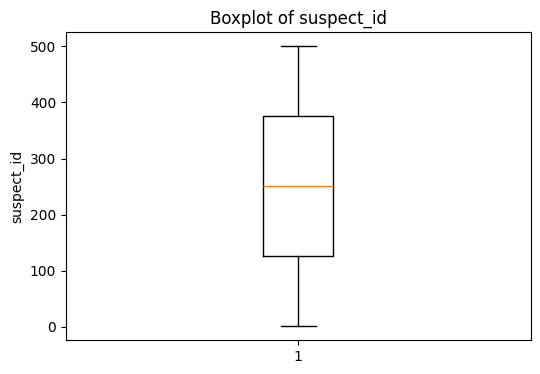

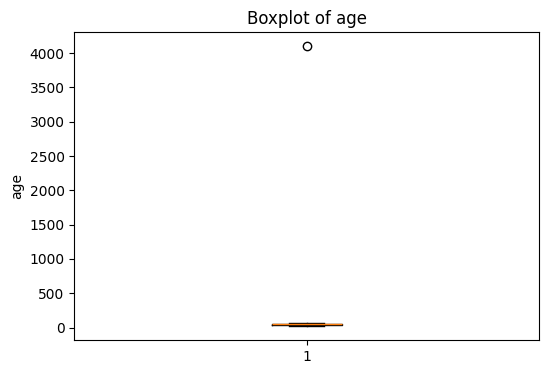

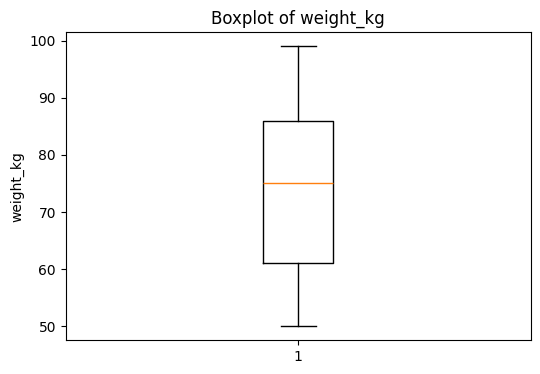

In [69]:
numeric_df_suspects = df_suspects.select_dtypes(include="number")
for col in numeric_df_suspects.columns:
  s = pd.to_numeric(numeric_df_suspects[col],errors ="coerce").dropna()   #Here we drop the nan values or else the plt won't work and will give blank plot
  plt.figure(figsize=(6,4))
  plt.boxplot(s)
  plt.ylabel(col)
  plt.title(f"Boxplot of {col}")
  plt.show()

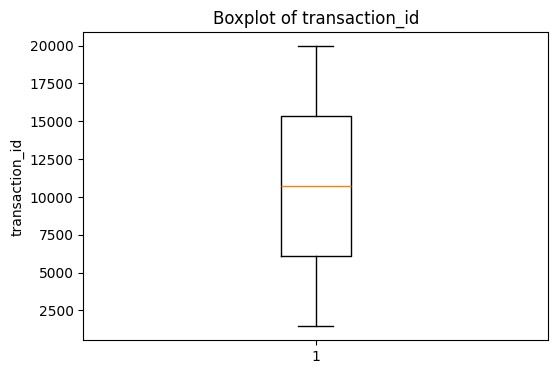

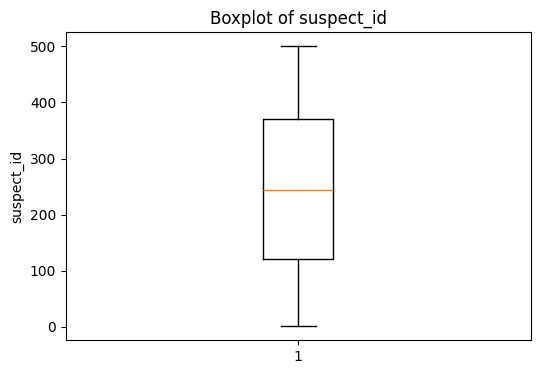

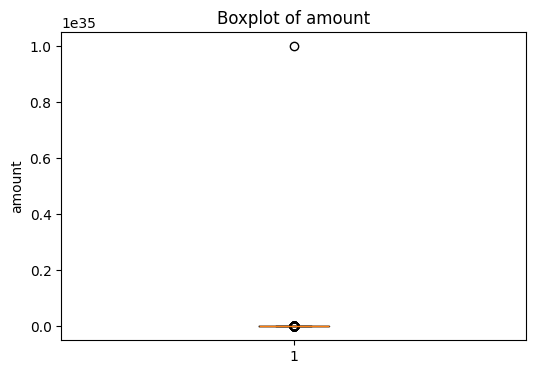

In [70]:
numeric_df = df_transactions.select_dtypes(include='number')
for col in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numeric_df[col])
    plt.ylabel(col)
    plt.title(f'Boxplot of {col}')
    plt.show()


**Observation from the above plots**\
The above plots further confirm the presence of **outliers** in columns **age** and **amount** from tables **suspects** and **transactions** respectively.

## Task 2: Data Cleaning and Type Casting

### 1. Date conversion
Converting date column of transactions dataset from string to date data-type.

In [71]:
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

/tmp/ipython-input-3535503871.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transactions['date'] = pd.to_datetime(df_transactions['date'])


In [72]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18508 entries, 0 to 18507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  18508 non-null  int64         
 1   suspect_id      18508 non-null  int64         
 2   date            18508 non-null  datetime64[ns]
 3   amount          18508 non-null  float64       
 4   category        18501 non-null  object        
 5   recipient       18508 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 867.7+ KB


Converting height column of suspects dataset from string to float.

In [78]:
df_suspects['height_cm']=pd.to_numeric(df_suspects['height_cm'],errors ="coerce").dropna()

In [79]:
df_suspects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   suspect_id   500 non-null    int64  
 1   name         500 non-null    object 
 2   occupation   500 non-null    object 
 3   nationality  500 non-null    object 
 4   age          496 non-null    float64
 5   height_cm    497 non-null    float64
 6   weight_kg    498 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 27.5+ KB


### 2. Missing Value Check on all tables:

In [73]:
df_suspects.isnull().sum()

,0
suspect_id,0
name,0
occupation,0
nationality,0
age,4
height_cm,1
weight_kg,2


In [74]:
df_transactions.isnull().sum()

,0
transaction_id,0
suspect_id,0
date,0
amount,0
category,7
recipient,0


**Observation**
* As observed before, here we get to reconfirm  that the features age(4), height(1) and weight(2) of Suspects dataset and the feature category(7) of transactions dataset have missing values.
* In total both the datasets have 7 missing values each.

**Summary of Data Inspection results**

1.   **Missing Values**: Age, height, weight (Suspects Dataset)
2.   **Missing Values**: category (Transactions Dataset)
3.   **Outliers**: Age (Suspects Dataset)
4.   **Outliers**: Amount (Transactions Dataset)
5.   **Type Conversion**: Date feature of Transactions dataset was converted from string data-type to date data-type.
6.   **Type Conversion**: height feature of Suspects dataset was converted from string data-type to float data-type.

**Other observations**

1.   From the date column we see maximum number of transactions were done on 15th October 2024 at 8:25 pm exactly 1 month before the CEO died.

2.   How is there 4 transactions at the same time?

3.   Maximum transactions of about 36 were made with Smith Group.



## Task 3: Feature Engineering
Summarising the raw transaction logs into meaningful features for each suspect.

### 1. Aggregation
Create a new dataFrame called **suspect_financials**
*   Group df_transactions by suspect id.
*   Calculate the **total spending**.
*   Calculate the **transaction count** (transaction id → count).
*   Rename the columns to **total_spent** and **num_transactions** for clarity.

In [83]:
suspect_financials = df_transactions.groupby("suspect_id").agg(total_spent=('amount','sum'),
                                                               num_transactions =('transaction_id','count')
).reset_index()

In [84]:
suspect_financials.head()

,suspect_id,total_spent,num_transactions
0,1,6494.72,53
1,2,4914.24,43
2,3,2887.32,24
3,4,32497.94,28
4,5,4355.72,30


## Task 4: Creating a Master Table

Creating a main dataset by joining the data from suspects and suspect_financials tables.

1. **Left Join**: Perform a pd.merge() between df suspects and suspect financials.
* **Key**: suspect id
* **How**: left (We want to keep all suspects, even if they have no transactions).
2. **Missing financials**: If any suspects have NaN for total spent (meaning they had no transactions), fill these values with 0.


In [85]:
df_master = pd.merge(df_suspects, suspect_financials, on = "suspect_id", how = "left")
df_master.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30


In [86]:
df_master.isna().sum()

,0
suspect_id,0
name,0
occupation,0
nationality,0
age,4
height_cm,3
weight_kg,2
total_spent,0
num_transactions,0


There are no missing values or NaN for total spent, so there is no need to apply any missing value logical imputation.

In [87]:
#df_master['total_spent','num_transactions']= df_master['total_spent','num_transactions'].fillna(0)

## Task 5: A first filter
**Tip-Off**\
Victim was known to only associate with individuals who were financially active.
1. **Filtering**: Filter your master DataFrame to include only suspects who have made **more than 20 transactions** in the recorded period.

2. **Result**: How many suspects remain in the pool after this filter?

###RESULT

The names of these remaining suspects. This reduced list will be the focus
of the next lab.

In [90]:
fil_df_master = df_master[df_master["num_transactions"]>20]
fil_df_master.head()

,suspect_id,name,occupation,nationality,age,height_cm,weight_kg,total_spent,num_transactions
0,1,William Jennings,"Designer, television/film set",Germany,56.0,165.00,52.0,6494.72,53
1,2,Lesley Wilson-Newman,"Engineer, communications",Italy,69.0,188.00,90.0,4914.24,43
2,3,Abdul Hopkins,Trade union research officer,Canada,46.0,154.00,94.0,2887.32,24
3,4,Mrs Lauren Green,Corporate investment banker,Isle of Man,32.0,1.71,67.0,32497.94,28
4,5,Tina Foster,Fitness centre manager,Portugal,60.0,178.00,96.0,4355.72,30


In [92]:
print(f"Remaining number of suspects from the filtered pool: {fil_df_master.shape[0]}")

Remaining number of suspects from the filtered pool: 431


## Names of the shortlisted Suspects

In [95]:
print(f"Name of the resultant suspects:")
fil_df_master['name']

Name of the resultant suspects:


,name
0,William Jennings
1,Lesley Wilson-Newman
2,Abdul Hopkins
3,Mrs Lauren Green
4,Tina Foster
...,...
494,Ms Melissa Morrison
495,Dr Connor Wilkinson
496,Marie Cooke-O'Connor
498,Patrick Marsh


## Saving the Master File
Saved the resultant shortlisted suspect list to a **master_suspects.csv** file.

In [97]:
fil_df_master.to_csv("/content/drive/MyDrive/Datascience_With_ML_Lab/datasets/master_suspects.csv",index=False)